In [1]:
from tensorflow import keras

model = keras.models.load_model('best-cnn-model.keras')
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense_4, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_5, built=True>]

In [2]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)
# 커널 크기 = (3, 3) / 깊이 1 / 필터 개수 32 -> (3, 3, 1, 32) / 필터마다 1개의 절편 -> (32, )

(3, 3, 1, 32) (32,)


In [3]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.036255036 0.28578213


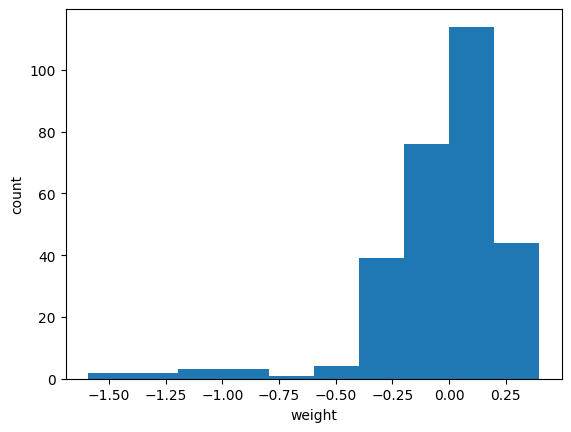

In [4]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

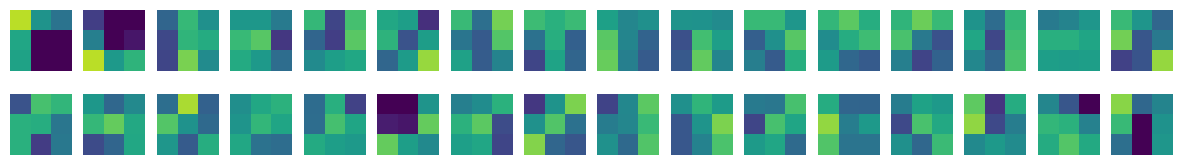

In [5]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:, :, 0, i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [6]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))

/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [8]:
no_trainig_weights = no_training_conv.weights[0].numpy()
print(no_trainig_weights.mean(), no_trainig_weights.std())

0.0007555758 0.08220738


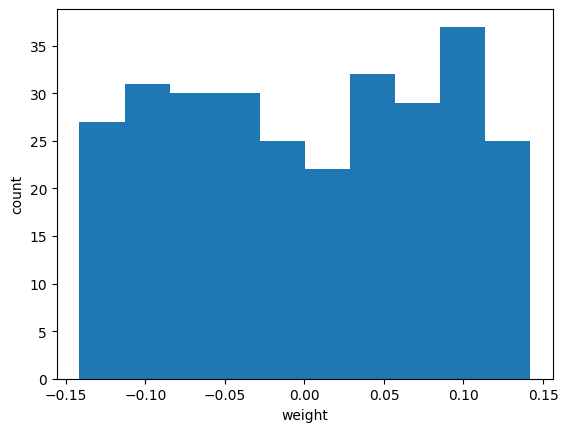

In [9]:
plt.hist(no_trainig_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

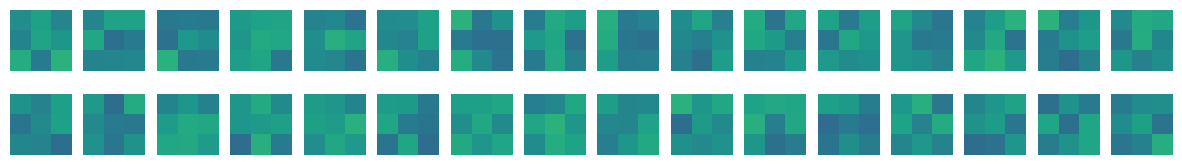

In [10]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_trainig_weights[:, :, 0, i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

## 함수형 API
> - 다중분류는 소프트맥스

In [12]:
print(model.input)

ValueError: The layer sequential has never been called and thus has no defined input.

In [ ]:
dense1 = keras.layers.Dense(100, activation='sigmoid')
dense2 = keras.layers.Dense(10, activation='softmax')

inputs = keras.Input(shape=(784, ))

hidden = dense1(inputs)

outputs = dense2(hidden)

model = keras.Model(inputs, outputs)

In [ ]:
model.input

In [ ]:
conv_acti = keras.Model(model.input, model.layers[0].output)

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [ ]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

In [ ]:
print(feature_maps.shape)